# Modeling and Simulation in Python

Chapter 7: Thermal systems

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


We'll start with the same code we saw last time: the magic command that tells Jupyter where to put the figures, and the import statement that gets the function defined in the `modsim` module.

In [1]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt|

# tempo switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

### The coffee cooling problem.

I'll use a `State` object to store the initial temperature.


In [105]:
T_init = UNITS.Quantity(90, UNITS.degC)
init = State(temp=T_init)
init

,value
temp,90 degC


And a `System` object to contain the system parameters.

In [112]:
T_env = UNITS.Quantity(22, UNITS.degC)
r = 0.01 / UNITS.min
t0 = 0 * UNITS.min
t_end = 30 * UNITS.min
dt = 1 * UNITS.min

coffee = System(init=init, T_env=T_env, r=r, t0=t0, t_end=t_end, dt=dt)
coffee

,value
init,temp 90 degC dtype: object
T_env,22 degC
r,0.01 1 / minute
t0,0 minute
t_end,30 minute
dt,1 minute


The `update` function implements Newton's law of cooling.

In [113]:
def update(system, state):
    """Update the thermal transfer model.
    
    system: System object
    state: State (temp)
    
    returns: State (temp)
    """
    T = state.temp
    dT = - system.r * (T - system.T_env) * system.dt
    return State(temp=T+dT)

Here's how it works.

In [114]:
update(coffee, init)

,value
temp,89.32 degC


In [152]:
system = coffee
df = TimeFrame(columns=system.init.index)
df.loc[float(system.t0.magnitude)] = system.init

In [149]:
array(1)

array(1)

In [153]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a DataFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    df = TimeFrame(columns=system.init.index)
    t0 = float(system.t0.magnitude)
    t_end = float(system.t_end.magnitude)
    
    df.loc[t0] = system.init
    
    for i in arange(t0, t_end):
        df.loc[i+1] = update_func(system, df.loc[i])
    
    system.results = df

In [154]:
run_simulation(coffee, update)
coffee.results

,temp
0.0,90 degC
1.0,89.32 degC
2.0,88.6468 degC
3.0,87.980332 degC
4.0,87.32052868000001 degC
5.0,86.66732339320001 degC
6.0,86.020650159268 degC
7.0,85.38044365767531 degC
8.0,84.74663922109856 degC
9.0,84.11917282888757 degC


In [155]:
plot(coffee.results.temp, label='coffee')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')

ValueError: setting an array element with a sequence.

ValueError: setting an array element with a sequence.

In [9]:
def final_temp(system):
    """Final temperature.
    
    system: System object with results.
    
    returns: temperature (C)
    """
    # TODO: if there are no results, return init.temp? 
    df = system.results
    return df.temp[system.t_end]

In [10]:
def run(volume, T_init, r, t_end):
    init = State(temp=T_init)
    system = System(volume=volume, init=init, T_env=22, 
                    r=r, t0=0, t_end=t_end)
    run_simulation(system, update)
    return system

In [11]:
coffee = run(volume=300, T_init=90, r=0.01, t_end=30)
final_temp(coffee)

72.2996253904031

In [12]:
def func(x):
    return (x-1) * (x-2) * (x-3)

In [13]:
fsolve(func, x0=0)

array([ 1.])

In [14]:
fsolve(func, 1.9)

array([ 2.])

In [15]:
fsolve(func, 2.9)

array([ 3.])

In [16]:
fsolve(func, 1.5)

array([ 3.])

In [17]:
def error_func1(r):
    """Runs a simulation and returns the `error`.
    
    r: thermal insulation factor
    
    returns: difference between final temp and 70C
    """
    system = run(volume=300, T_init=90, r=r, t_end=30)
    return final_temp(system) - 70

In [18]:
error_func1(r=0.01)

2.2996253904030937

In [88]:
solution = fsolve(error_func1, 0.01, xtol=1e-8)
r_coffee = solution[0]
r_coffee

In [20]:
coffee = run(volume=300, T_init=90, r=r_coffee, t_end=30)
final_temp(coffee)

70.0000000000064

**Exercise:**

In [21]:
milk = run(volume=50, T_init=5, r=0.1, t_end=15)
final_temp(milk)

18.499850754390966

In [22]:
def error_func2(r):
    """Runs a simulation and returns the `error`.
    
    r: thermal insulation factor
    
    returns: difference between final temp and 20C
    """
    system = run(volume=50, T_init=5, r=r, t_end=15)
    return final_temp(system) - 20

In [23]:
error_func2(r=0.1)

-1.500149245609034

In [24]:
solution = fsolve(error_func2, 0.1)
r_milk = solution[0]
r_milk

0.13296078935465339

In [25]:
milk = run(volume=50, T_init=5, r=r_milk, t_end=15)
final_temp(milk)

19.999999999999613

In [26]:
milk = run(volume=50, T_init=5, r=r_milk, t_end=30)
final_temp(milk)

21.76470588235285

Saving figure to file chap07-fig01.pdf


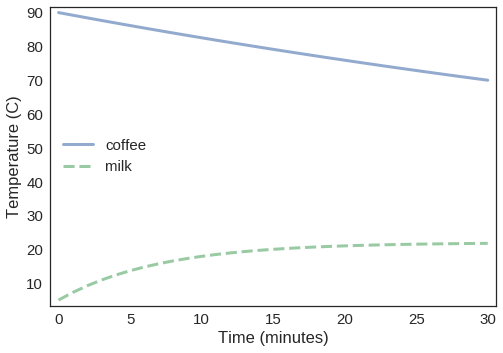

In [27]:
plot(coffee.results.temp, label='coffee')
plot(milk.results.temp, '--', label='milk')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)',
         loc='center left')

savefig('chap07-fig01.pdf')

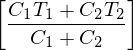

In [28]:
sympy.init_printing() 

from sympy import symbols, Eq, solve

C1, C2, T1, T2, T = symbols('C1 C2 T1 T2 T')

eq = Eq(C1 * (T - T1) + C2 * (T - T2), 0)

solve(eq, T)

In [29]:
def mix(s1, s2):
    assert s1.t_end == s2.t_end
    
    volume = s1.volume + s2.volume
    
    temp = (s1.volume * final_temp(s1) + 
            s2.volume * final_temp(s2)) / volume
    
    init = State(temp=temp)
    mixture = System(volume=volume, init=init, T_env=22, 
                    r=s1.r, t0=s1.t_end, t_end=30)
    
    return mixture

In [30]:
coffee = run(volume=300, T_init=90, r=r_coffee, t_end=30)
milk = run(volume=50, T_init=5, r=r_milk, t_end=30)
final_temp(coffee), final_temp(milk)

In [31]:
mix_last = mix(coffee, milk)
mix_last.init.temp

In [32]:
coffee = run(volume=300, T_init=90, r=r_coffee, t_end=1)
milk = run(volume=50, T_init=5, r=r_milk, t_end=1)
mix_first = mix(coffee, milk)
mix_first.init.temp

In [33]:
run_simulation(mix_first, update)
final_temp(mix_first)

In [34]:
def run_and_mix(t_add):
    coffee = run(volume=300, T_init=90, r=r_coffee, t_end=t_add)
    milk = run(volume=50, T_init=5, r=r_milk, t_end=t_add)
    mixture = mix(coffee, milk)
    run_simulation(mixture, update)
    return final_temp(mixture)

In [35]:
run_and_mix(1)

In [36]:
run_and_mix(15)

In [37]:
run_and_mix(30)

In [38]:
sweep = Sweep()
for t_add in range(1, 30):
    temp = run_and_mix(t_add)
    sweep[t_add] = temp

Saving figure to file chap07-fig02.pdf


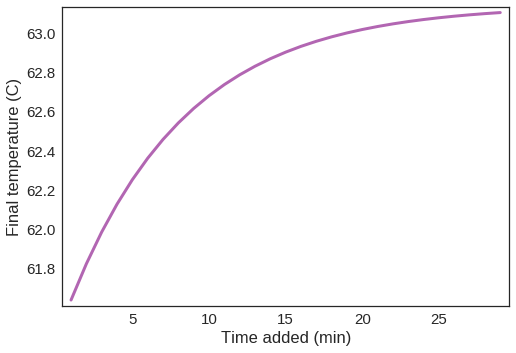

In [39]:
plot(sweep, color='purple')
decorate(xlabel='Time added (min)',
         ylabel='Final temperature (C)',
         legend=False)

savefig('chap07-fig02.pdf')

In [40]:
from sympy.printing import latex

def show(expr, show_latex=True):
    if show_latex:
        print(latex(expr))
    return expr

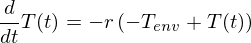

In [41]:
from sympy import symbols, Function, diff, Eq, dsolve

T_init, T_env, r, t = symbols('T_init T_env r t')
T = symbols('T', cls=Function)

eqn = Eq(diff(T(t), t), -r * (T(t) - T_env))
eqn

In [42]:
solution_eq = dsolve(eqn)
show(solution_eq)

T{\left (t \right )} = C_{1} e^{- r t} + T_{env}


In [43]:
general = solution_eq.rhs
general

In [44]:
at0 = general.subs(t, 0)
at0

In [45]:
solutions = solve(Eq(at0, T_init), C1)
value_of_C1 = solutions[0]
value_of_C1

In [46]:
particular = general.subs(C1, value_of_C1)
show(particular)

T_{env} + \left(- T_{env} + T_{init}\right) e^{- r t}


In [47]:
t_end, T_end = symbols('t_end T_end')

In [48]:
at_end = particular.subs(t, t_end)
at_end

\frac{1}{t_{end}} \log{\left (\frac{- T_{env} + T_{init}}{T_{end} - T_{env}} \right )}


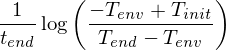

In [49]:
solutions = solve(Eq(at_end, T_end), r)
value_of_r = solutions[0]
show(value_of_r)

In [67]:
subs = dict(t_end=30, T_end=70, T_init=90, T_env=22)
r_coffee2 = value_of_r.evalf(subs=subs)
type(r_coffee2)

sympy.core.numbers.Float

In [69]:
r_coffee2 = float(r_coffee2)
r_coffee2, type(r_coffee2)

(0.011610223142273859, float)

In [77]:
def run_analysis(system):
    T_init = system.init.temp
    T_env = system.T_env
    
    ts = arange(system.t0, system.t_end+1)
    Ts = T_env + (T_init - T_env) * np.exp(-system.r * ts)
    series = TimeSeries(Ts, index=ts)
    
    system.results = TimeFrame(series, columns=['temp'])

In [78]:
init = State(temp=90)
coffee2 = System(volume=300, init=init, T_env=22, 
                 r=r_coffee2, t0=0, t_end=30)
run_analysis(coffee2)
final_temp(coffee2)

In [89]:
coffee = run(volume=300, T_init=90, r=r_coffee, t_end=30)
final_temp(coffee)

In [90]:
coffee.results - coffee2.results

,temp
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
